# Exploratory Data Analysis of Bitcoin Price

## 1. Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r"C:\Users\minht\Downloads\da_practice\cypto\1 Bitcoin.csv")

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3128 non-null   object 
 1   Open       3128 non-null   float64
 2   High       3128 non-null   float64
 3   Low        3128 non-null   float64
 4   Close      3128 non-null   float64
 5   Adj Close  3128 non-null   float64
 6   Volume     3128 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 171.2+ KB


In [4]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Conclude

1. `Date` column has wrong data type => Change into Datetype
2. Null values: 0
3. Duplicated values: 0

## 2. Cleaning

Change `Date` column to date type by using datetime package.

In [6]:
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### 3. Analysis

Now I want to add `Return` column for see the changing of `Adj Close` over time.

In [7]:
df['Return'] = df['Adj Close'].pct_change()

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.069843
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035735
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024659
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,0.008352


Build stats Dataframe for each column of the dataset

In [9]:
def unistats(df):
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Mean', 'Mode', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col, 'Count'] = df[col].count()
            output_df.loc[col, 'Missing'] = df[col].isna().sum()
            output_df.loc[col, 'Unique'] = df[col].nunique()
            output_df.loc[col, 'Dtype'] = df[col].dtype.name
            output_df.loc[col, 'Mean'] = df[col].mean()
            output_df.loc[col, 'Mode'] = df[col].mode().iloc[0]
            output_df.loc[col, 'Min'] = df[col].min()
            output_df.loc[col, '25%'] = df[col].quantile(q=0.25)
            output_df.loc[col, 'Median'] = df[col].median()
            output_df.loc[col, '75%'] = df[col].quantile(q=0.75)
            output_df.loc[col, 'Max'] = df[col].max()
            output_df.loc[col, 'Std'] = df[col].std()
            output_df.loc[col, 'Skew'] = df[col].skew()
            output_df.loc[col, 'Kurt'] = df[col].kurtosis()
        else:
            output_df.loc[col, 'Count'] = df[col].count()
            output_df.loc[col, 'Missing'] = df[col].isna().sum()
            output_df.loc[col, 'Unique'] = df[col].nunique()
            output_df.loc[col, 'Dtype'] = df[col].dtype.name
            
    return output_df

unistats(df)

,Count,Missing,Unique,Dtype,Mean,Mode,Min,25%,Median,75%,Max,Std,Skew,Kurt
Date,3128,0,3128,datetime64[ns],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,3128,0,3124,float64,13201.092562,233.421997,176.897003,716.452759,7366.695069,19104.46289,67549.734375,16046.89113,1.481289,1.198092
High,3128,0,3125,float64,13530.948451,244.251007,211.731003,737.216262,7531.903808,19371.187012,68789.625,16455.726157,1.477767,1.173846
Low,3128,0,3127,float64,12838.913262,429.076996,171.509995,707.772491,7228.239747,18597.033203,66382.0625,15578.487373,1.482419,1.21609
Close,3128,0,3125,float64,13209.052482,236.153,178.102997,721.55751,7369.5,19111.459961,67566.828125,16044.674101,1.479298,1.192061
Adj Close,3128,0,3125,float64,13209.052482,236.153,178.102997,721.55751,7369.5,19111.459961,67566.828125,16044.674101,1.479298,1.192061
Volume,3128,0,3128,int64,16608362537.404093,5914570,5914570,113744500.0,9053831365.5,28077637141.75,350967941479,19776465521.355148,2.711512,27.477964
Return,3127,1,3127,float64,0.002094,-0.371695,-0.371695,-0.013326,0.001678,0.017767,0.252472,0.038032,-0.148202,7.212672


In [10]:
min_date = df.Date.min()
max_date = df.Date.max()

print(min_date)
print(max_date)

2014-09-18 00:00:00
2023-04-11 00:00:00


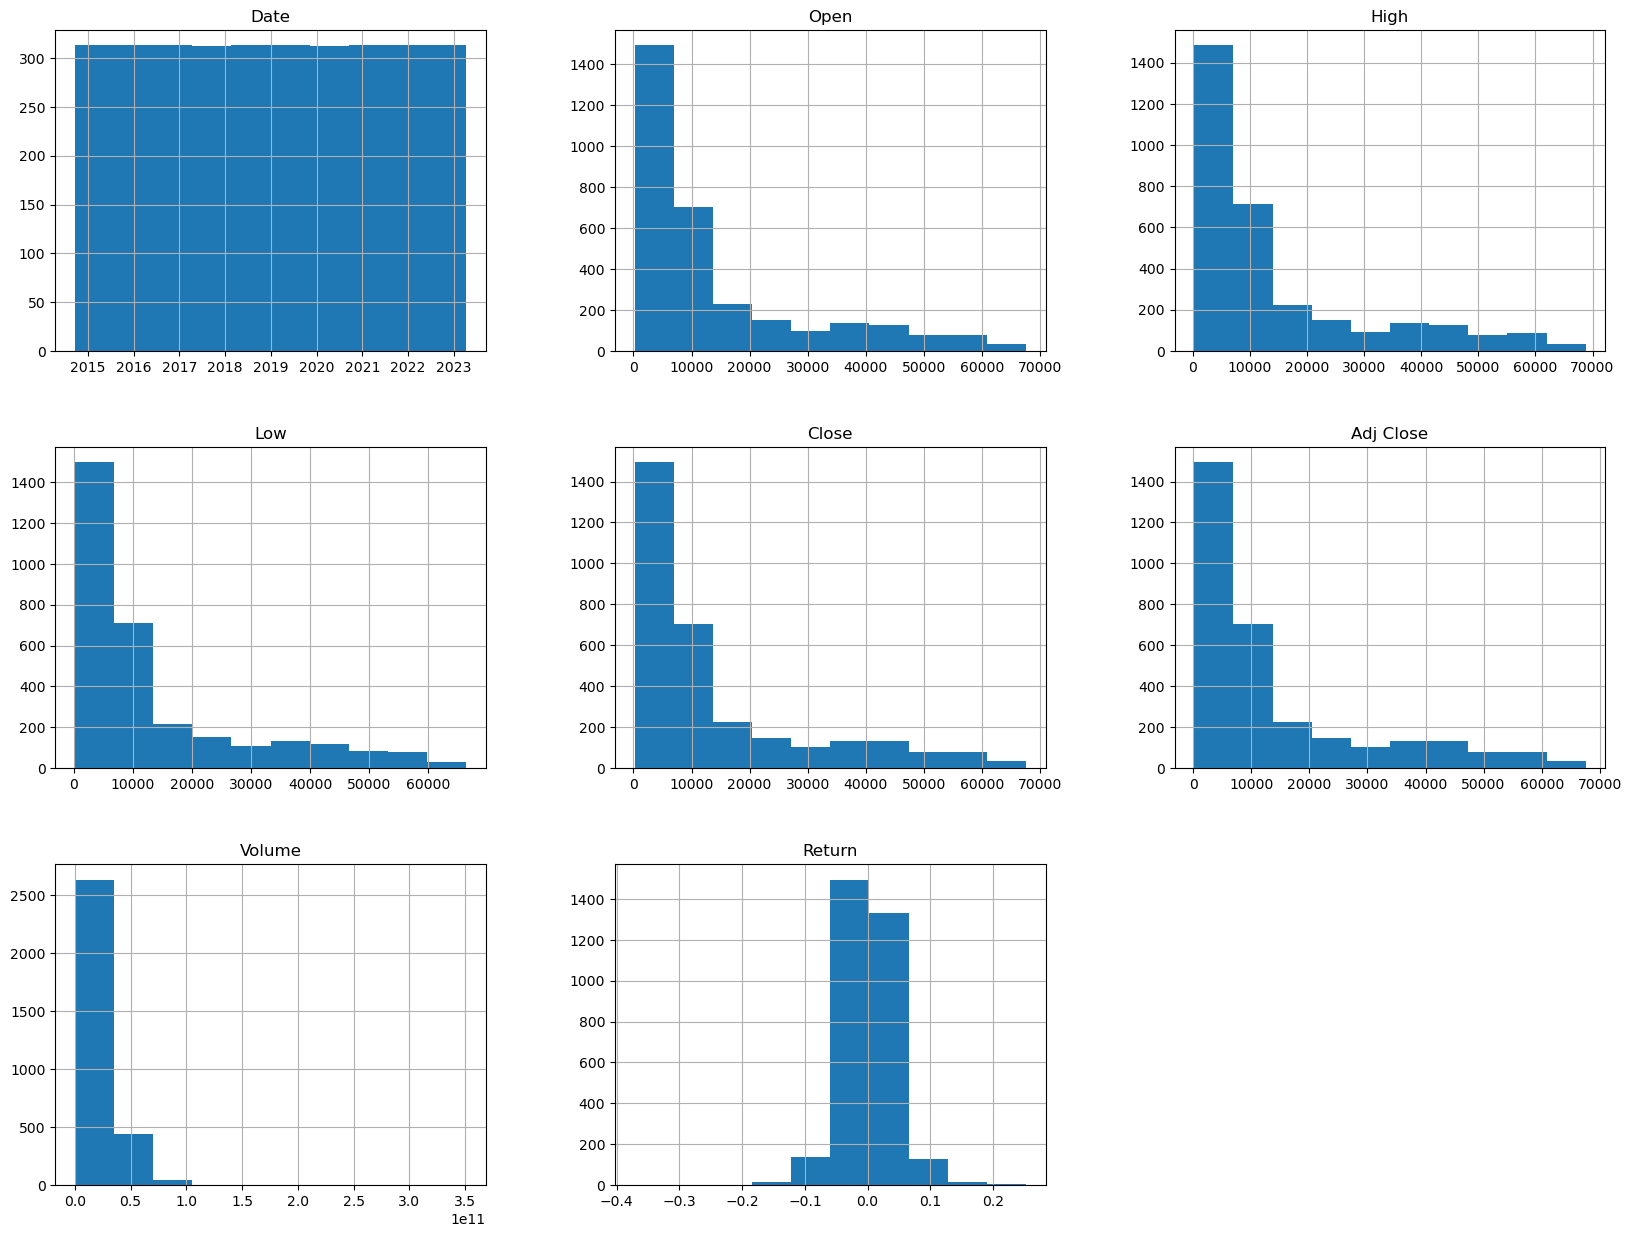

In [11]:
df.hist(figsize=(20,15))
plt.show()

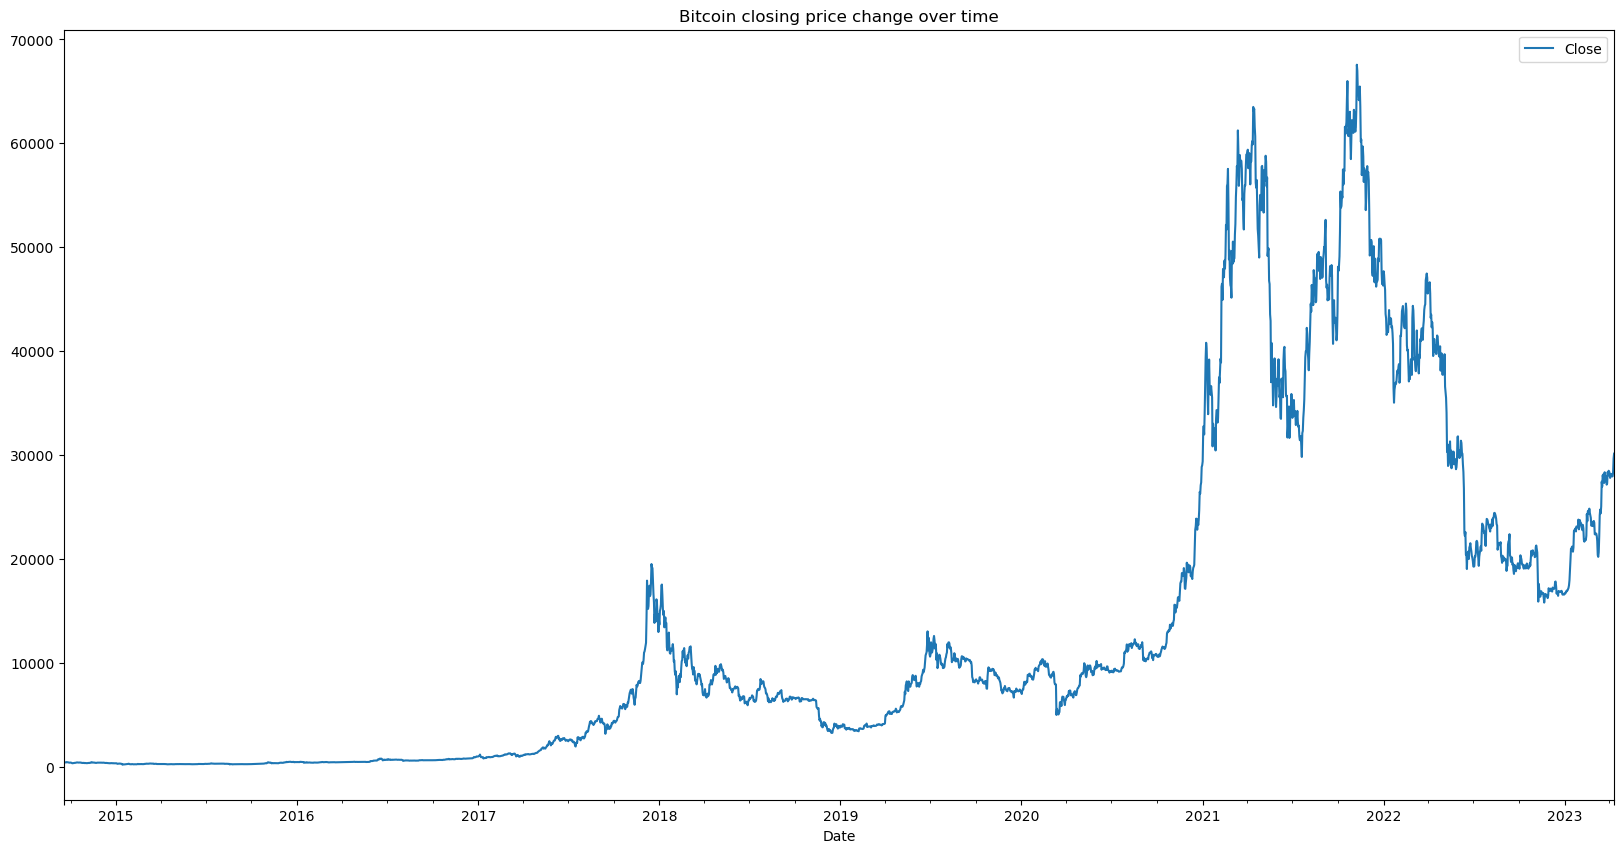

In [12]:
ax = df.plot(x='Date', y='Close', figsize=(20,10))
ax.set_title('Bitcoin closing price change over time')
plt.show()

In [ ]:
df['Adj Close'].

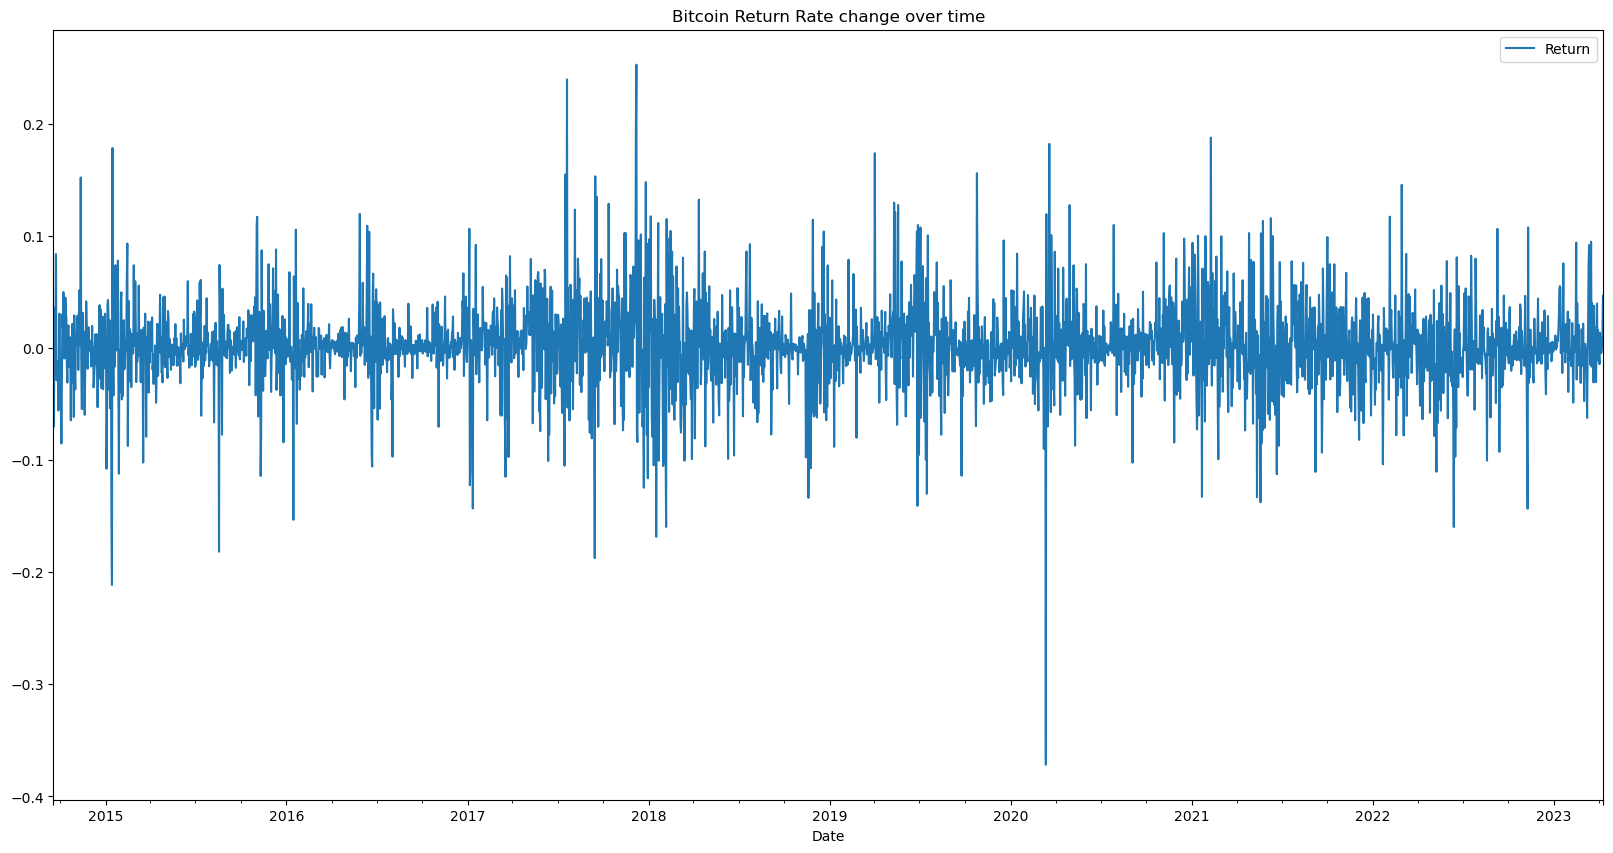

In [13]:
ax = df.plot(x='Date', y='Return', figsize=(20,10))
ax.set_title('Bitcoin Return Rate change over time')
plt.show()

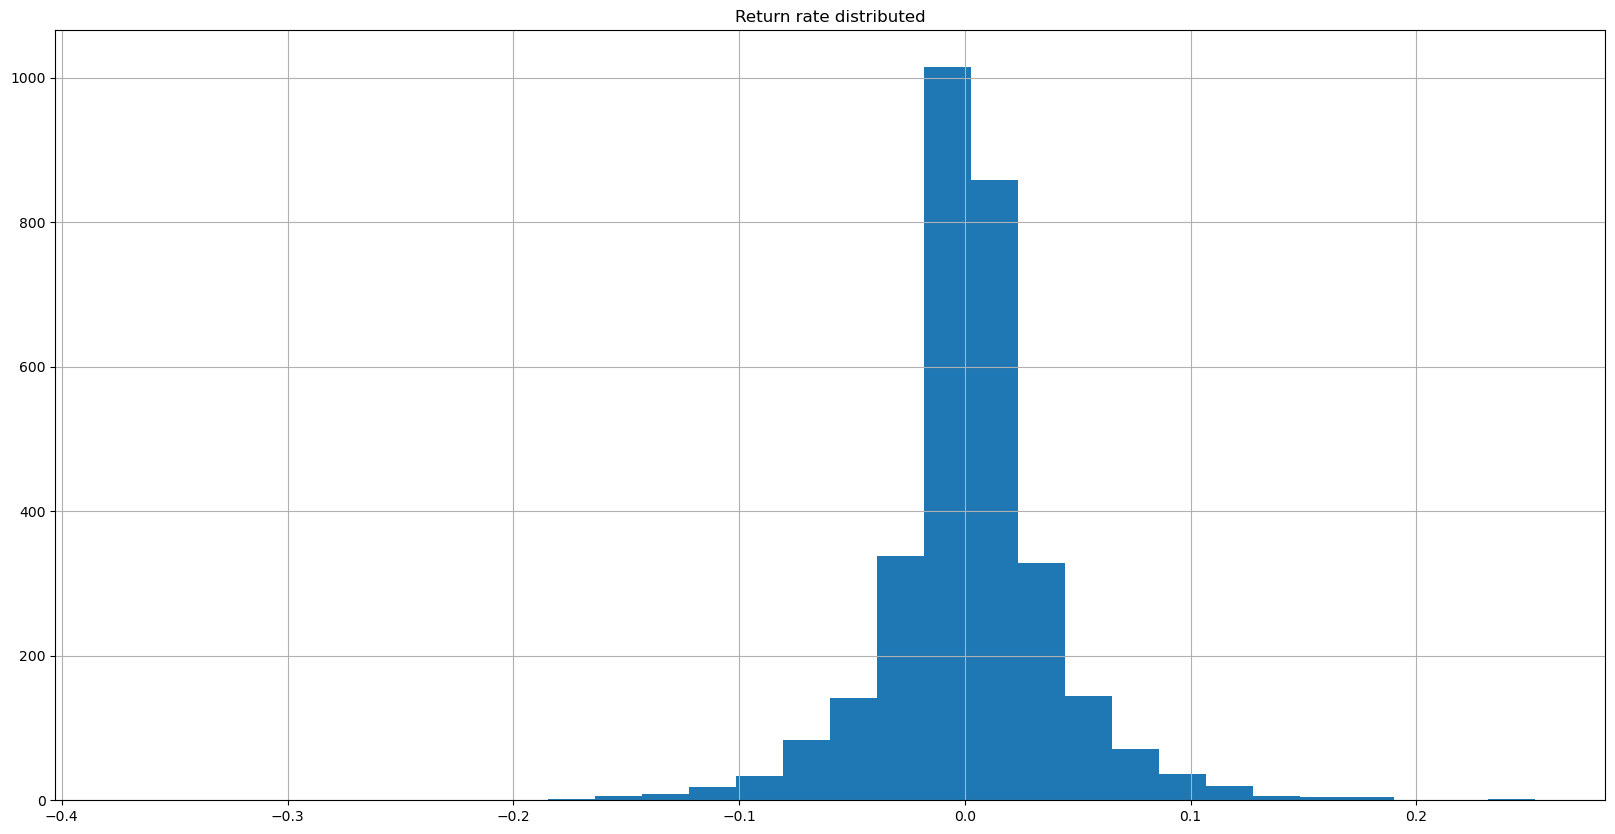

In [14]:
ax = df['Return'].hist(bins=30, figsize=(20,10))
ax.set_title('Return rate distributed')
plt.show()

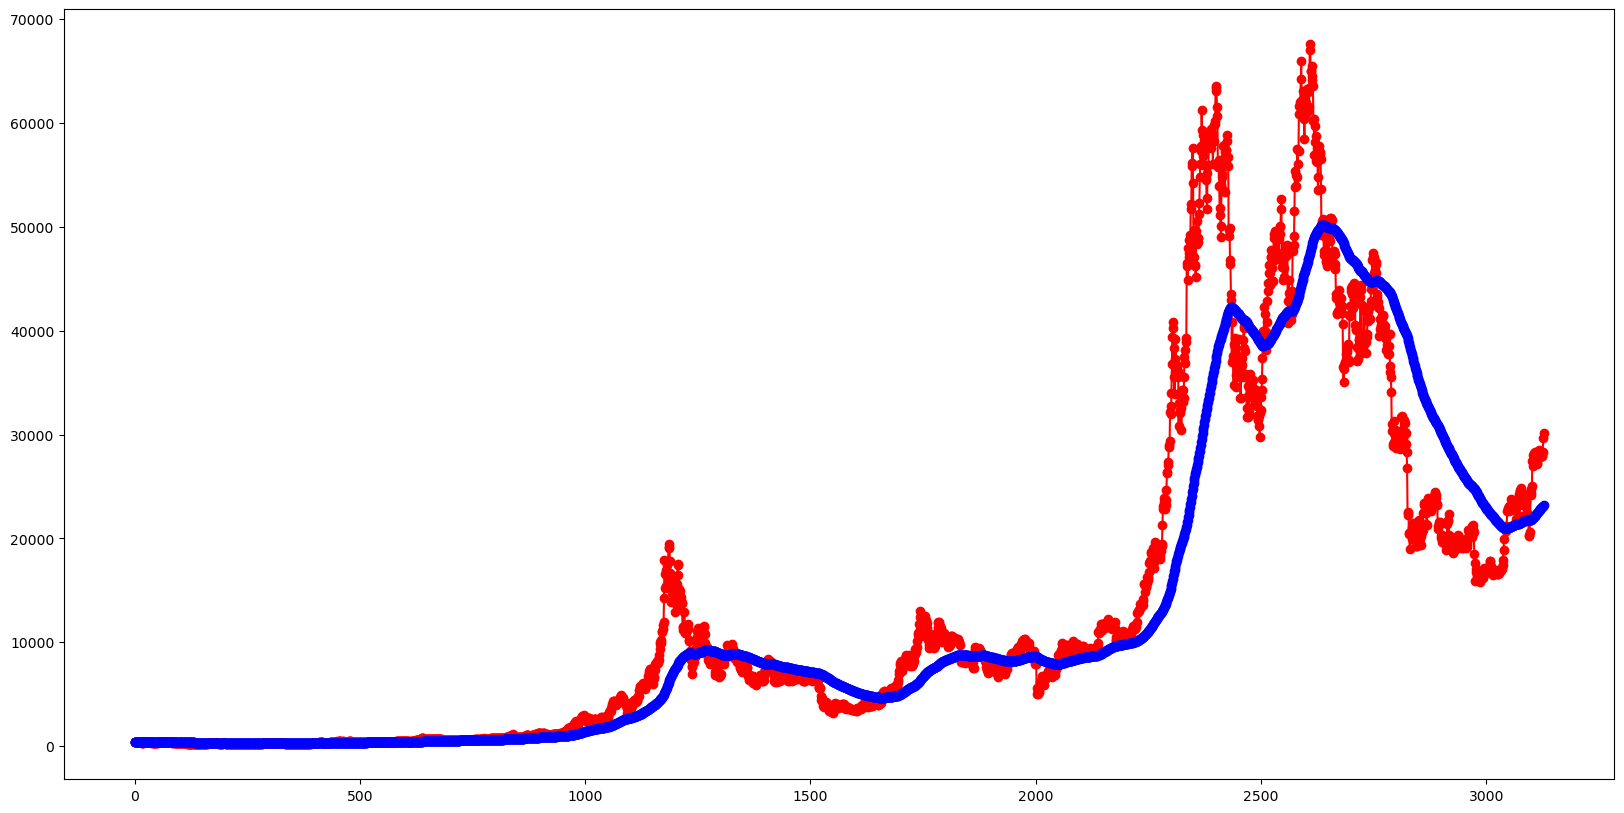

In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(df['Adj Close']).fit(smoothing_level=.01, optimized = False)

df['Adj Close'].plot(marker='o', color='red',figsize=(20,10))
model.fittedvalues.plot(marker='o', color='blue',figsize=(20,10))
plt.show()

In [16]:
df[['Date','High']].sort_values(by='High',ascending=False)[:2]

,Date,High
2610,2021-11-10,68789.625000
2609,2021-11-09,68530.335938


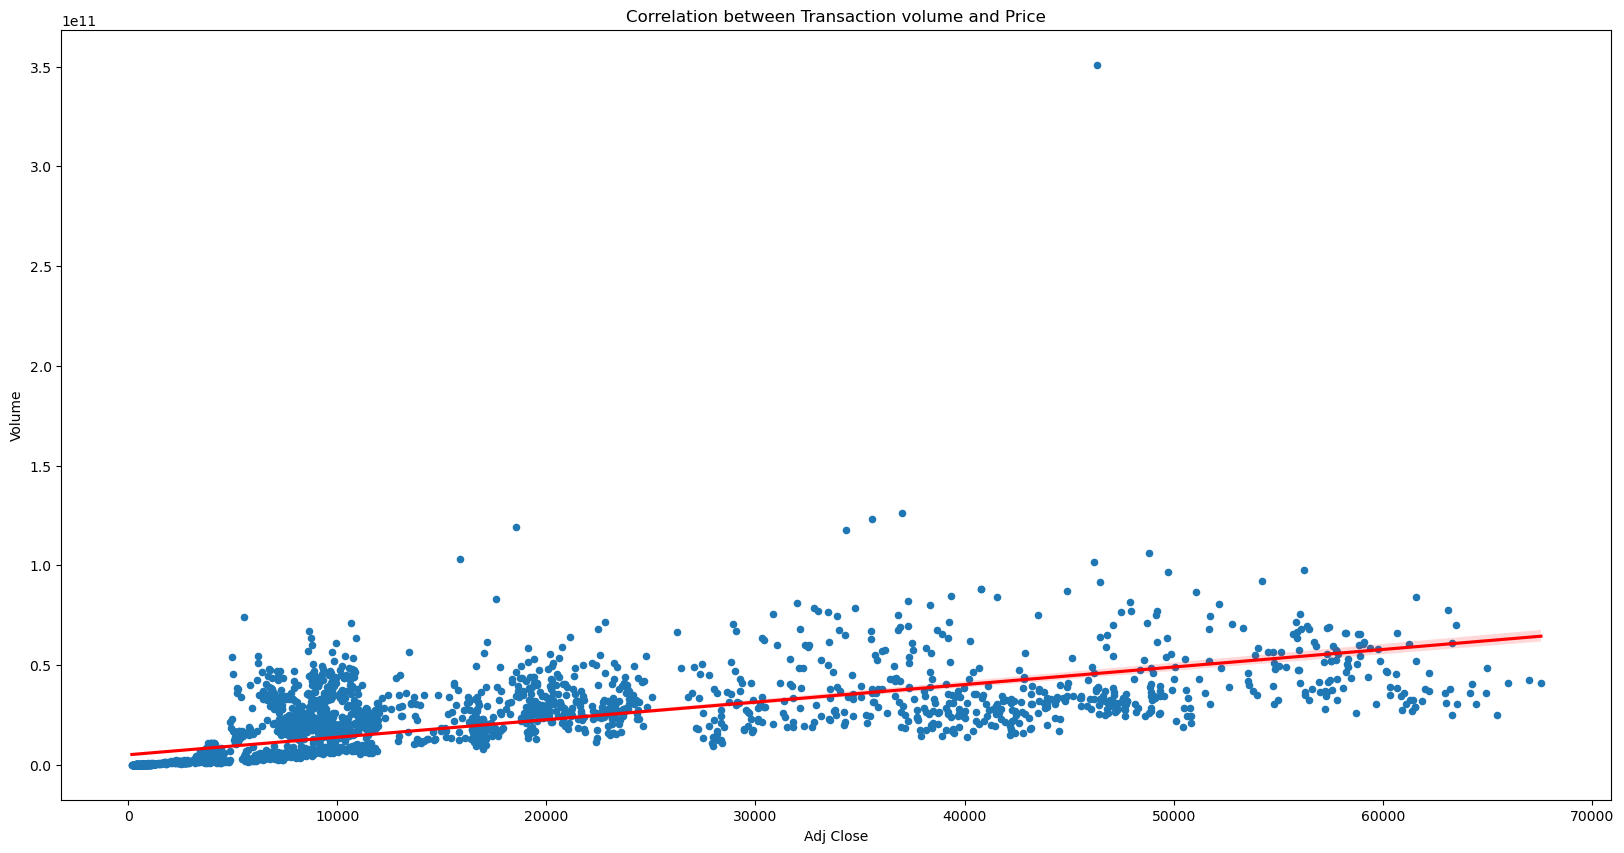

In [17]:
ax = df.plot(kind='scatter', x='Adj Close', y='Volume', figsize=(20,10))
ax.set_title('Correlation between Transaction volume and Price')

sns.regplot(x='Adj Close', y='Volume', data=df, scatter=False, color='red')

plt.show()

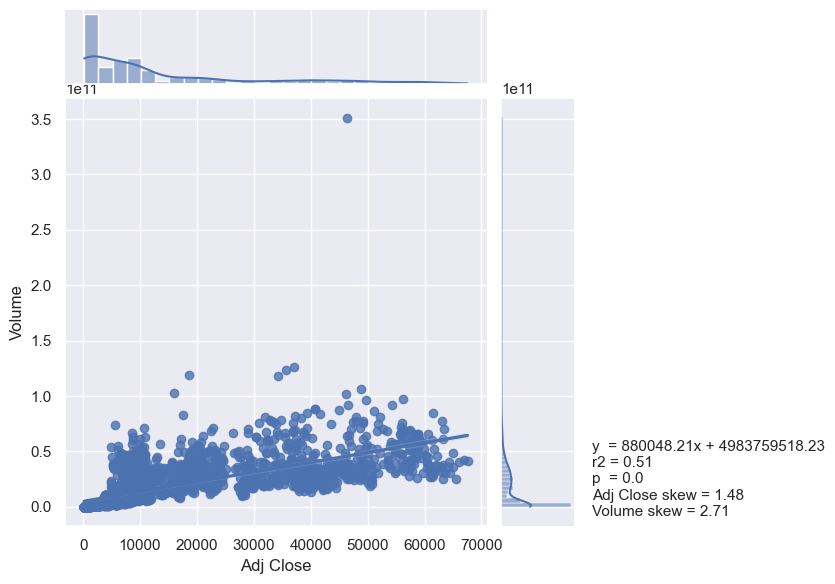

In [24]:
def scatter(feature, label):
    import seaborn as sns
    from scipy import stats
    import matplotlib.pyplot as plt
    import pandas as pd
    
    # Calculate the regression line
    m, b, r, p, err = stats.linregress(feature, label)
    
    textstr  = 'y  = ' + str(round(m,2)) + 'x + ' + str(round(b,2)) + '\n'
    textstr += 'r2 = ' + str(round(r**2,2)) + '\n'
    textstr += 'p  = ' + str(round(p,2)) + '\n'
    textstr += str(feature.name) + ' skew = ' + str(round(feature.skew(),2)) + '\n'
    textstr += str(label.name) + ' skew = ' + str(round(label.skew(), 2)) + '\n'
    
    sns.set(color_codes=True)
    ax = sns.jointplot(x=feature, y=label, kind='reg')
    ax.fig.text(1, 0.1, textstr, fontsize=11, transform=plt.gcf().transFigure)
    
scatter(df['Adj Close'], df['Volume'])